# Исследование данных сервиса быстрой доставки

**Данные**: зарегистрированные пользователи и их заказы.   
   
**Проблема**: у сервиса снижается количество уникальных пользователей.   
   
**Задача:** проанализировать основные метрики и провести RFM сегментацию клиентов. Подготовить предложения по улучшению продукта.

Для начала обозначим факторы, которые влияют на Retention rate в сфере доставки еды.   
1. **Качество сервиса**: клиенты остались недовольны уровнём обслуживания: качество еды и упаковки, недостающие или перепутанные товары, вежливость курьера и поддержки. Любой из этих пунктов может привести к потере клиента.   
    В данной ситуации метод RFM может помочь сегментировать клиентов и определить, какой сталкивается с подобными проблемами и принять таргетированные решения по улучшению их опыта взаимодействия с сервисом;
2. **Скорость доставки**: чем быстрее доставка, тем лучше. Сервису доставки необходимо постоянно следить, как быстро доставляются заказы, как часто нарушаются прогнозные сроки доставки. Если доставка еды в определённых районах или из конкретных магазинов, ресторанов становится меньше, нужно выявлять причины и работать над их исправлениями. Падение среднего времени доставки по сравнению с аналогичными заказами у клиентов, как и сами просрочки, могут привести к потере клиентов.   
   
    Примеры проблем, которые могут привести к ухудшению скорости доставки или появлению просрочек:
    * неправильная организация работы курьеров (количество курьеров в определённом районе не сможет обработать спрос);
    * ошибки со стороны ресторанов;
    * некорректные прогнозы времени доставки.   
       
    RFM здесь также поможет выявить, сталкиваются ли с такими проблемами определённые сегменты и принять решения, которые улучшат сервис для как можно бóльшего количество клиентов.
3. **Конкурентные цены и ценообразование**: доставка еды предполагает наличие дополнительных расходов со стороны бизнеса по сравнению с традиционной версией питания в ресторане или кафе (работа сервиса, курьера и др.). Сервисы доставки стремятся к тому, чтобы цены были максимально приближены к ценам в ресторанах (и даже дешевле) и стараются оптимизировать свои расходы, чтобы клиенты предпочитали их сервис. Также на предпочтения клиентов может влиять, как именно формируется цена (отдельная плата за доставку, комиссия).    
    Исходя из этого, увеличение стоимости заказа по сравнению с конкурентами, а также плохо подобранное ценообразование может повлечь к потере клиентов.   
    


RFM-анализ применим в аналитике данных сервиса доставки еды по следующим причинам:
1) сервис стремиться к высокой регулярности покупок (в отличии, например, от сервиса продажи недвижимости);
2) возможность собирать данные о покупках в разрезе пользователя;
3) возможность влиять на решения покупателя.

RFM может помочь, например, определить VIP-клиентов с частыми и дорогими заказами и предлагать им персональные предложения, чтобы повысить лояльность. Клиентам с низкой частотой заказов и недорогими заказами можно предлагать таргетированные скидки или стимулирующие акции, чтобы снизить вероятность оттока.

# Чтение и предобработка данных

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
orders = pd.read_excel(
    'demo_data.xlsx', sheet_name='orders'
)

In [3]:
registrations = pd.read_excel(
    'demo_data.xlsx', sheet_name='registrations'
) 

In [4]:
# функция для первого просмотра данных
def first_view(data) :
    display(data.head())
    data.info()
    print('')
    print(f'количество дубликатов в данных: {data.duplicated().sum()}')

In [5]:
first_view(orders)

,order_id,user_id,created_at,order_amount,discount
0,63da3cbf2d95d6499efa4191,449e112fc29c236d8a722173d1f45be6,2023-02-01,107.90,0.0
1,63e47bec3a63d2afb19a2190,5738b0aec9a5c0c8bb3acaf7e906076b,2023-02-09,39.00,0.0
2,63e9b561db223821d7f89a38,4816c12497b24bb139b0e244bd08428f,2023-02-13,14.50,0.0
3,63e8b439f59f5773ec2bf4d2,f5f25032a84e3092530b69cbcec7f046,2023-02-12,27.00,0.0
4,63e9c1bef59f5773ec2bfd45,487fbf3c3c120897bb6350a92a3dfc5d,2023-02-13,80.45,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21672 entries, 0 to 21671
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      21672 non-null  object        
 1   user_id       21672 non-null  object        
 2   created_at    21672 non-null  datetime64[ns]
 3   order_amount  21672 non-null  float64       
 4   discount      21672 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 846.7+ KB

количество дубликатов в данных: 0


In [6]:
first_view(registrations)

,user_id,created_at
0,ce26e83c606eac7f793c68d55637e719,2023-01-30
1,216fa9b712f91d2859e56f47e0fa2aeb,2023-02-07
2,114032c7e47080f2a0e9dcb68a082fa7,2023-01-16
3,dc76b077bb1424f220c263623583f795,2022-12-25
4,64a6113f0602feb4b55d0f14e9c3e7d1,2022-12-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33322 entries, 0 to 33321
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     33322 non-null  object        
 1   created_at  33322 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 520.8+ KB

количество дубликатов в данных: 0


In [7]:
# проверим, есть ли нулевые заказы в данных
orders.query('order_amount == 0')

,order_id,user_id,created_at,order_amount,discount
681,63da8e252d95d6499efa4659,2077de1e45a5c8cc8df2d41d95c2d3eb,2023-02-01,0.0,0.0
15982,639744b9113c9390104bf80c,a67494e77e394e84fb6de5c4160dcfbd,2022-12-12,0.0,0.0
16411,639c583a71225a3fe3762975,a67494e77e394e84fb6de5c4160dcfbd,2022-12-16,0.0,0.0
16412,639c566a71225a3fe376294f,a67494e77e394e84fb6de5c4160dcfbd,2022-12-16,0.0,0.0
16710,63a1ab2f71225a3fe37661f9,a67494e77e394e84fb6de5c4160dcfbd,2022-12-20,0.0,0.0
17285,63a7ff9a0da3895020a5c2a6,4bc14178cc9732e03c433d27261041cc,2022-12-25,0.0,0.0
17730,63abf7b3412d45e101597ae6,2f683dc311bbae5d2fd1411c72d20c5e,2022-12-28,0.0,0.0
18578,63bc4199a982b6116d99d37d,7b49364a2192b7f94801e89053131736,2023-01-09,0.0,0.0
18695,63bd5a785b2be3ed5ae485b2,86335a90e6c8531aea4fba6713494892,2023-01-10,0.0,0.0
18785,63bd863e5b2be3ed5ae48870,08b8caec4e4c7298ebc98d9de7e7debb,2023-01-10,0.0,0.0


In [8]:
# удалим такие заказы
orders = orders[orders['order_amount'] != 0]

In [9]:
orders['discount'].describe()

count    21655.000000
mean         4.025914
std         14.560998
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1192.000000
Name: discount, dtype: float64

In [10]:
# столбец discount содержит сумму, на которую была снижена стоимость заказа со скидкой.
# добавим столбец с финальной стоимостью заказа
orders['final_amount'] = orders['order_amount'] - orders['discount']

In [11]:
#убедимся, что в датасетах не повторяются id
print(registrations.user_id.duplicated().sum())
print(orders.order_id.duplicated().sum())

0
0


Пропусков и дубликатов в данных нет, типы данных правильные. Можем приступать к анализу.

# Подготовка к анализу

In [12]:
# для начала получим информацию о временной периоде заказов
print(f'Длительность анализируемого периода: {orders["created_at"].max() - orders["created_at"].min()} ')
print(f'Данные собраны за временной период {orders["created_at"].min()} - {orders["created_at"].max()}')

Длительность анализируемого периода: 150 days 00:00:00 
Данные собраны за временной период 2022-09-25 00:00:00 - 2023-02-22 00:00:00


In [13]:
# получим информацию о временной периоде регистраций
print(f'Длительность анализируемого периода: {registrations["created_at"].max() - registrations["created_at"].min()} ')
print(f'Данные собраны за временной период {registrations["created_at"].min()} - {registrations["created_at"].max()}')

Длительность анализируемого периода: 150 days 00:00:00 
Данные собраны за временной период 2022-09-25 00:00:00 - 2023-02-22 00:00:00


Составим план работы по анализу данных:
1. Составить дерево метрик от главной метрики выручки;
2. Посчитать метрики за весь период;
3. Посчитать метрики в динамике;
4. Визуализировать результаты.

Посчитаем метрики из следующего дерева метрик:
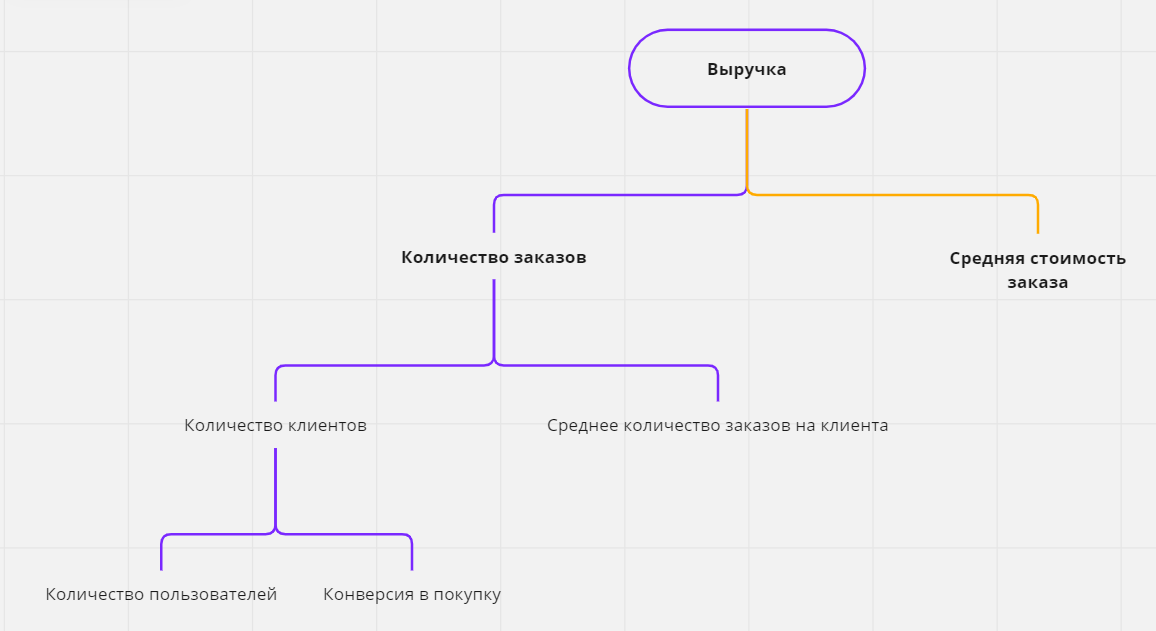

In [14]:
users_total = registrations['user_id'].count()
conv_rate = orders['user_id'].nunique() / registrations['user_id'].nunique() * 100
clients_total = orders['user_id'].nunique()
orders_per_client = orders['order_id'].count() / clients_total
orders_total = orders['order_id'].count()
avg_order = orders['final_amount'].sum() / orders_total
orders_amount_total = orders['final_amount'].sum()

print(f"Количество пользователей: {users_total}")
print(f"Конверсия пользователей в покупку: {round(conv_rate, 2)}%")
print('')
print(f"Количество клиентов: {clients_total}")
print(f"Среднее количество заказов на клиента: {round(orders_per_client, 2)}")
print('')
print(f"Всего заказов: {orders_total}")
print(f"Средняя стоимость заказа: {round(avg_order, 2)}")
print('')
print(f"Выручка: {round(orders_amount_total, 2)}")

Количество пользователей: 33322
Конверсия пользователей в покупку: 18.06%

Количество клиентов: 6018
Среднее количество заказов на клиента: 3.6

Всего заказов: 21655
Средняя стоимость заказа: 67.9

Выручка: 1470366.84


Дополнительно посчитаем средний доход с клиента и пользователя - `arppu`, `arpu`.

In [15]:
arpu = orders_amount_total / users_total
arppu = orders_amount_total / clients_total
print(f"Средний доход с клиента: {round(arppu,2)}")
print(f"Средний доход с пользователя: {round(arpu, 2)}")

Средний доход с клиента: 244.33
Средний доход с пользователя: 44.13


Мы получили ключевые метрики за весь период анализа. Можно также посмореть эти показатели в динамике.

### Составим сводную таблицу по датам периода анализа. Посчитаем показатели в разрезе по датам

In [16]:
orders_grouped_by_data = orders.groupby('created_at').agg(
                        {'order_id' : 'count',
                        'user_id' : 'nunique',
                        'final_amount' : 'sum'})\
                        .reset_index()

orders_grouped_by_data.columns = ['created_at', 'orders', 'buyers', 'amount']
orders_grouped_by_data = orders_grouped_by_data.merge(registrations.groupby('created_at')['user_id'].count().reset_index(),
                                                     on='created_at')
orders_grouped_by_data['created_at'] = pd.to_datetime(orders_grouped_by_data['created_at']).dt.date
orders_grouped_by_data

,created_at,orders,buyers,amount,user_id
0,2022-09-25,123,115,6547.1400,92
1,2022-09-26,122,99,5386.8100,130
2,2022-09-27,122,104,4749.2500,233
3,2022-09-28,131,103,5408.2500,229
4,2022-09-29,121,106,4532.8300,205
...,...,...,...,...,...
146,2023-02-18,100,86,6779.5835,39
147,2023-02-19,118,100,7825.7500,47
148,2023-02-20,119,106,10018.3028,44
149,2023-02-21,113,102,8423.0280,65


Перейдём к визуализации данных.

In [17]:
# перед визуализацией добавим по всем столбцам скользящее среднее, чтобы снизить шумы в данных
for column in orders_grouped_by_data.columns.values[1:]:
        orders_grouped_by_data[column] = orders_grouped_by_data[column].rolling(7).mean()

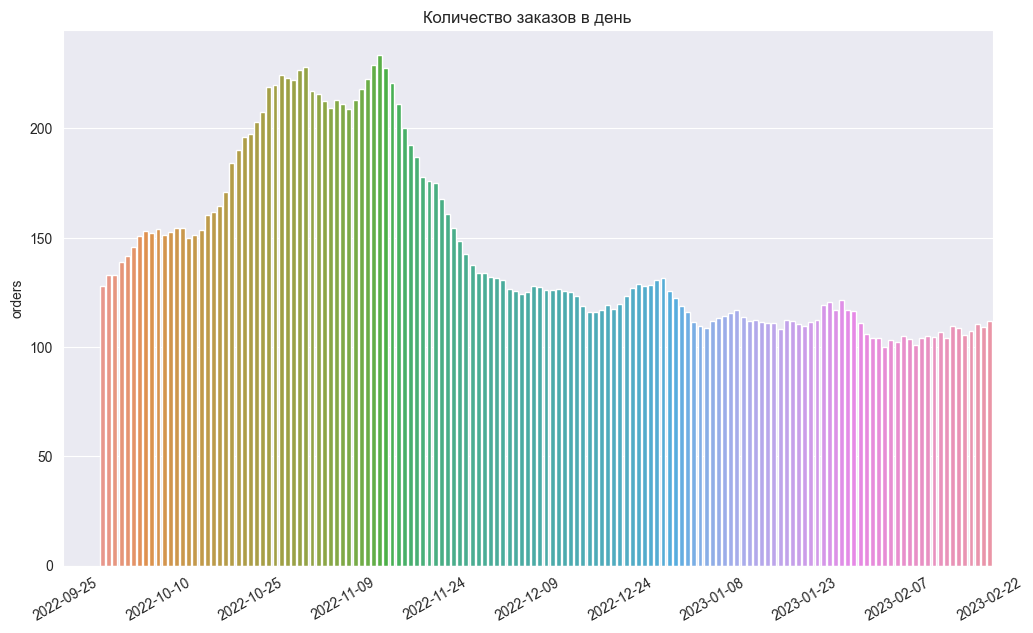

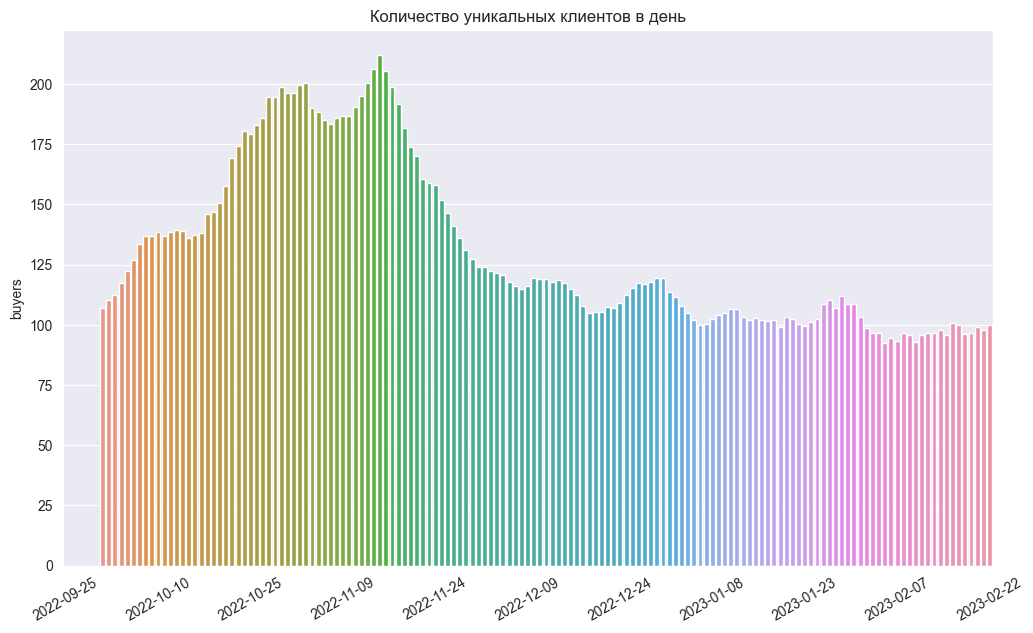

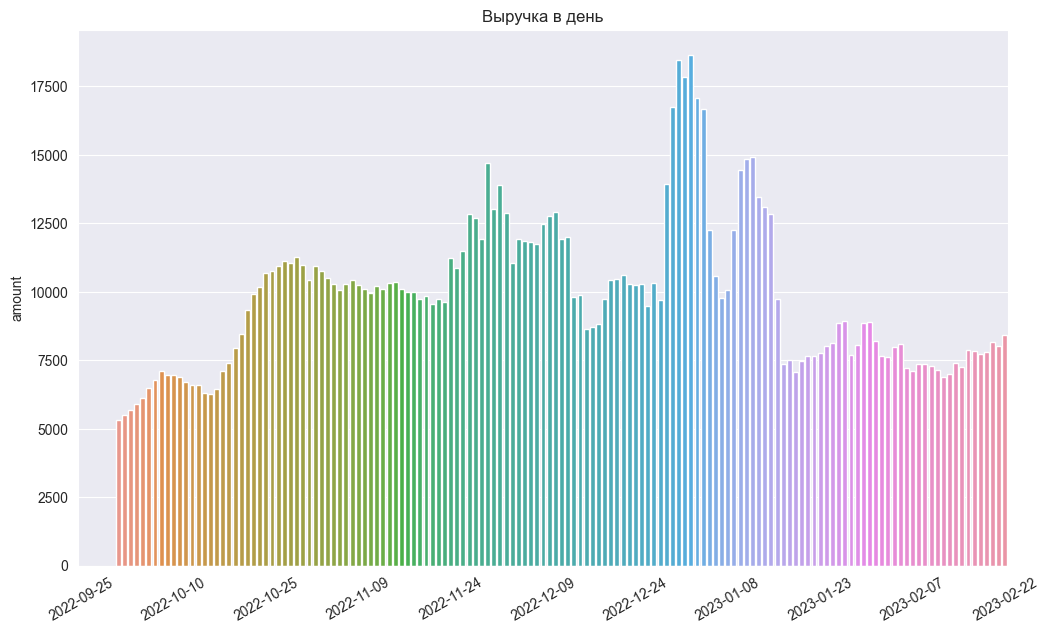

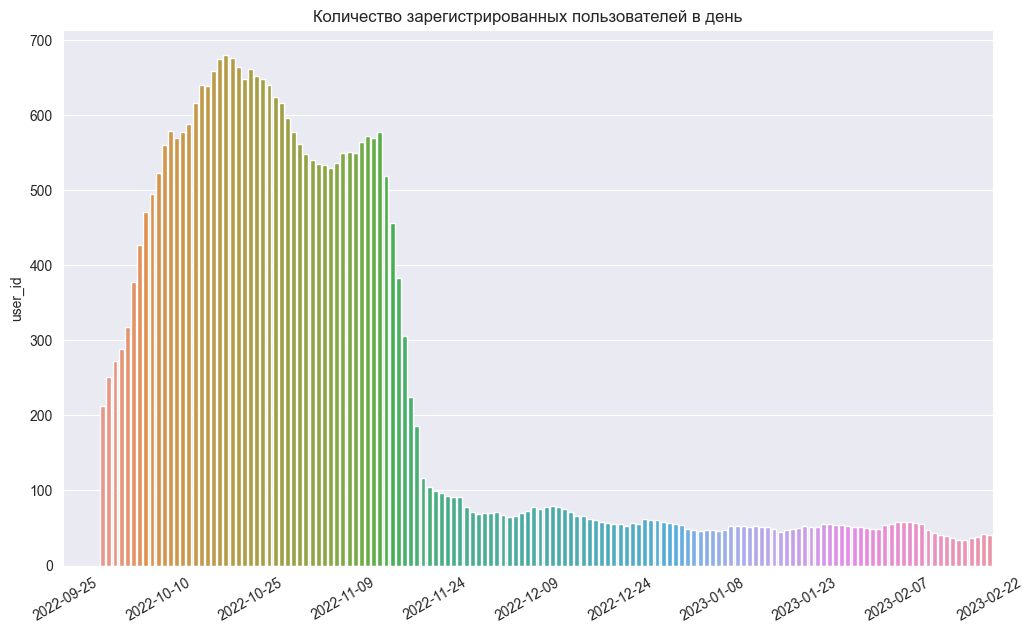

In [18]:
sns.set_style('darkgrid')
plot_labels = ["", 'Количество заказов в день', 
               "Количество уникальных клиентов в день", 
               "Выручка в день", 
               "Количество зарегистрированных пользователей в день"]

for num, column in enumerate(orders_grouped_by_data.columns) :
    if not num == 0 :
        plt.figure(figsize=(12,32))
        ax = plt.subplot(len(orders_grouped_by_data.columns[1:]), 1, num)
        sns.barplot(data=orders_grouped_by_data, x='created_at', y=column, ax=ax)
        ax.set_title(plot_labels[num])
        plt.xticks(range(0,151, 15), rotation=30)
        plt.xlabel('')
plt.show;

### Выводы
До конца ноября 2022 г. сервис активно привлекал пользователей. Каждый день регистрировалось около 500 и более пользователей. Далее до конца периода каждый день регистрировалось около 50 пользователей.   
Также уже после конца ноября падало количество уникальных клиентов в день и количество заказов. При этом выручка в день выросла с первого до последнего дня анализа с 5000 до 7500. В праздничные новогодние дни выручка резко росла до 15000 и более.   

# RFM-анализ

Шаги для подготовки данных и проведения RFM-анализа:
1) составление профилей пользователей с показателями recency, frequency и monetary value;
2) визуализация распределения каждого параметра;   
3) присвоение ранга пользователям по каждому параметру.

Мы проанализируем распределения клиентов по критериям давности покупки, выручке и частоте покупок.   
Клиентам будут присвоены ранги с учётом следующих факторов:
* нужен ли бизнесу дифференцированный подход к таким пользователям;
* специфика бизнеса;
* тенденции на графике распределения.

In [19]:
# сводная таблица с профилями пользователей
users_rfm = orders.groupby('user_id', as_index=False).agg(
                                            {'final_amount' : 'sum', 
                                            'created_at' : 'max',
                                            'order_id' : 'count'}
                                            )
users_rfm.columns = ['user_id', 'amount', 'last_order', 'orders_count']
users_rfm.head()

,user_id,amount,last_order,orders_count
0,000a1a24f246db2b8ad97885aa0c80d8,970.11,2023-02-22,13
1,003ab63c16d08f754d4b23a3c3af23f1,108.41,2023-01-08,1
2,0042f6f65862ff7f84d75ac9cbc90493,133.77,2022-11-21,3
3,004cf4d0fe7666e6feccf5231418db51,17.25,2022-10-19,1
4,00550dbe72634dc5695f8ac73bc296fe,71.52,2022-11-23,2


In [20]:
# задаём момента анализа
obs_date = (max(users_rfm['last_order'] + timedelta(days=1)))

# добавляем кол-во дней с последней покупки
users_rfm['days_from_last_order'] = users_rfm['last_order'].apply(lambda x: obs_date - x).dt.days.astype('int16')
print(f"Момент анализа: {obs_date}")
users_rfm.head()

Момент анализа: 2023-02-23 00:00:00


,user_id,amount,last_order,orders_count,days_from_last_order
0,000a1a24f246db2b8ad97885aa0c80d8,970.11,2023-02-22,13,1
1,003ab63c16d08f754d4b23a3c3af23f1,108.41,2023-01-08,1,46
2,0042f6f65862ff7f84d75ac9cbc90493,133.77,2022-11-21,3,94
3,004cf4d0fe7666e6feccf5231418db51,17.25,2022-10-19,1,127
4,00550dbe72634dc5695f8ac73bc296fe,71.52,2022-11-23,2,92


#### recency

C:\ProgramData\anaconda3\envs\practicum\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


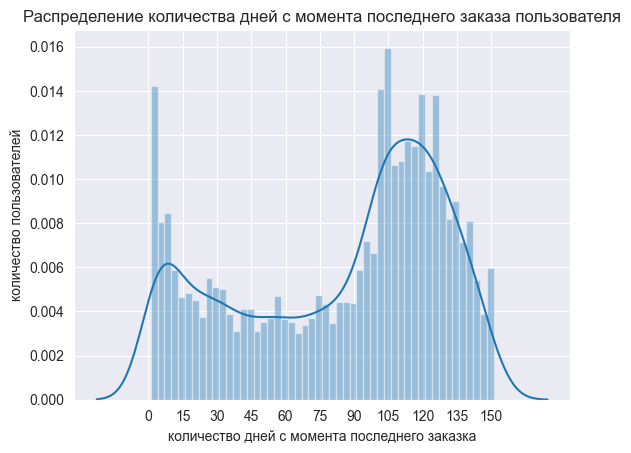

In [21]:
# визуализируем распределение значений количества дней с последней покупки
sns.distplot(users_rfm['days_from_last_order'], bins=50)
plt.title('Распределение количества дней с момента последнего заказа пользователя')
plt.ylabel('количество пользователей')
plt.xlabel('количество дней с момента последнего заказка')
plt.xticks(range(0,151, 15));

Существенное количество клиентов совершали последний заказ более 90 дней назад, что говорит об их оттоке.   
   
На основе полученных данных разделим пользователей по recency:
* меньше 9 дней - `3`: активные пользователи, которые, скорее всего, совершают покупку каждую неделю
* от 9 дней до 90 - `2`: клиенты, которые пользовались сервисом уже после периода активного привлечения пользователей. Их можно считать "оттоковыми"
* 90 дней и более - `1`: также "оттоковые" клиенты, но пользовались сервисом уже очень давно.

In [22]:
# ранги для recency
def recency_score(recency) :
    if recency < 9 :
        return 3
    elif (recency >= 9) and (recency < 90) :
        return 2
    else:
        return 1
users_rfm['recency'] = users_rfm['days_from_last_order'].apply(recency_score)

In [23]:
users_rfm

,user_id,amount,last_order,orders_count,days_from_last_order,recency
0,000a1a24f246db2b8ad97885aa0c80d8,970.11,2023-02-22,13,1,3
1,003ab63c16d08f754d4b23a3c3af23f1,108.41,2023-01-08,1,46,2
2,0042f6f65862ff7f84d75ac9cbc90493,133.77,2022-11-21,3,94,1
3,004cf4d0fe7666e6feccf5231418db51,17.25,2022-10-19,1,127,1
4,00550dbe72634dc5695f8ac73bc296fe,71.52,2022-11-23,2,92,1
...,...,...,...,...,...,...
6013,ffaa3fae421586985ae344e3729ad6f5,34.75,2023-01-11,1,43,2
6014,ffb97c36e3e8ebfb3eb7c1a30d8c1035,10.58,2022-10-19,1,127,1
6015,ffc616fcb1f0847a35dfaad4ebc97d38,22.74,2022-10-03,1,143,1
6016,ffccf44a8b32ba1f1a78a73971462a0d,21.91,2022-10-29,1,117,1


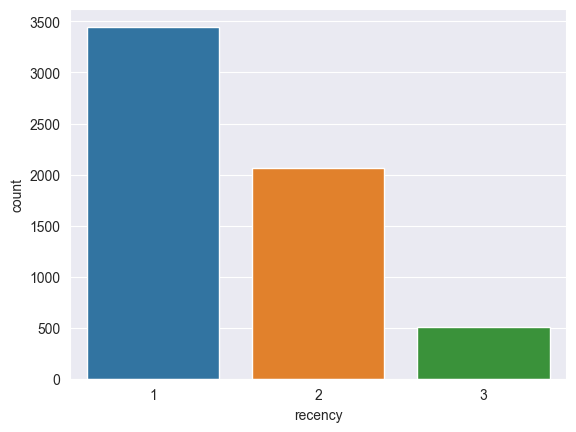

In [24]:
sns.countplot(data=users_rfm, x='recency');

#### frequency

C:\ProgramData\anaconda3\envs\practicum\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


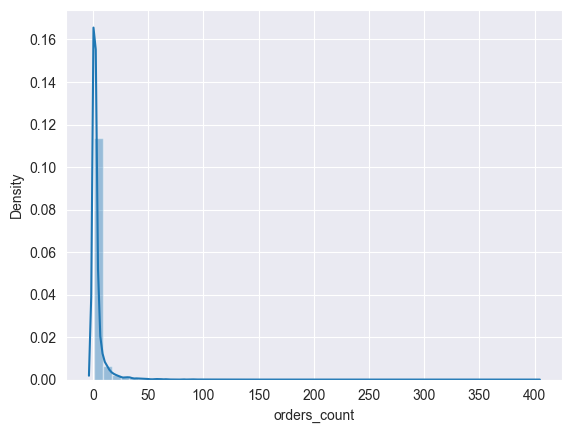

In [25]:
sns.distplot(users_rfm['orders_count']);

Сократим диапазон для более точной оценки данных.

C:\ProgramData\anaconda3\envs\practicum\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


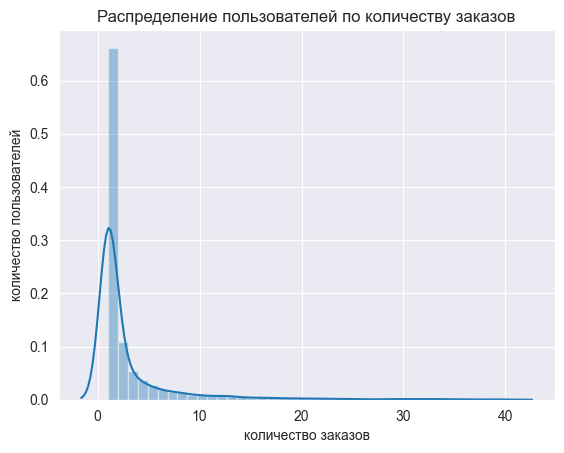

In [26]:
sns.distplot(users_rfm.query('orders_count <= 40')['orders_count'], bins=40)
plt.title('Распределение пользователей по количеству заказов')
plt.ylabel('количество пользователей')
plt.xlabel('количество заказов');

Значительное большинство клиентов совершили 1-2 заказа. Такие пользователи потеряли интерес после первых покупок.   
   
На основе полученных данных разделим пользователей по frequency:
* больше 10 заказов - `3`: активные пользователи. Если у таких пользователей будет низкий ранг по recency, значит мы потеряли таких пользователей, что критично для сервиса.
* от 3 до 10 - `2`: клиенты, которые редко пользуются сервисом, Либо стали активно пользоваться, но потеряли интерес. Для таких пользователей стоит также разработать меры по "оживлению".
* 1-2 заказа - `1`: "оттоковые" клиенты, которых с первых покупок не заинтересовал наш сервис. Оживить их будет сложно, поэтому не стоит тратить на них большое количество ресурсов.

In [27]:
# ранги для frequency
def frequency_score(frequency) :
    if frequency > 10 :
        return 3
    elif frequency > 2 :
        return 2
    else:
        return 1
users_rfm['frequency'] = users_rfm['orders_count'].apply(frequency_score)

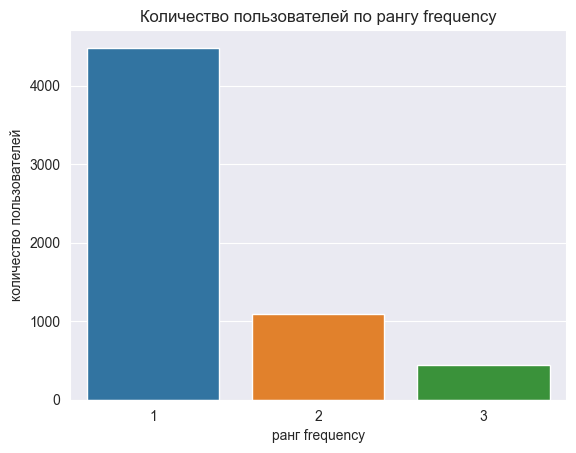

In [28]:
sns.countplot(data=users_rfm, x='frequency')
plt.title('Количество пользователей по рангу frequency')
plt.ylabel('количество пользователей')
plt.xlabel('ранг frequency');

#### monetary value

Рассмотрим критерий monetary value на основе общей выручки с каждого клиента. 

C:\ProgramData\anaconda3\envs\practicum\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


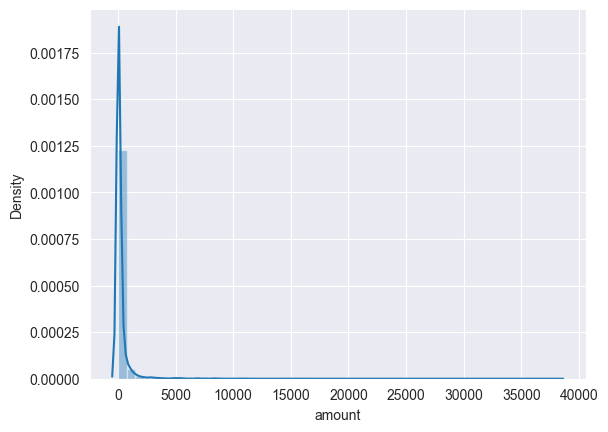

In [29]:
sns.distplot(users_rfm['amount']);

C:\ProgramData\anaconda3\envs\practicum\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


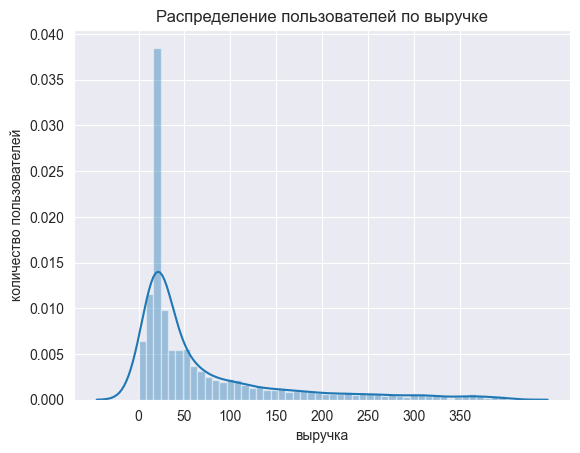

In [30]:
sns.distplot(users_rfm.query('amount <= 400')['amount'])
plt.title('Распределение пользователей по выручке')
plt.ylabel('количество пользователей')
plt.xlabel('выручка')
plt.xticks(range(0,400, 50));

C:\ProgramData\anaconda3\envs\practicum\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


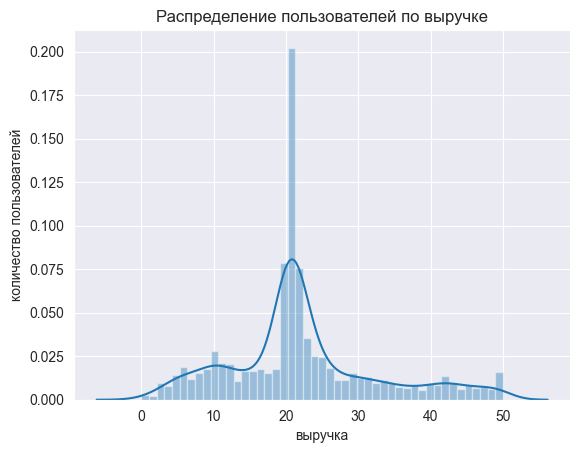

In [31]:
sns.distplot(users_rfm.query('amount <= 50')['amount'])
plt.title('Распределение пользователей по выручке')
plt.ylabel('количество пользователей')
plt.xlabel('выручка');

На основе полученных данных разделим пользователей по monetary value:

больше 100 - `3`: клиенты с рекордными . Таких клиентов можно назвать VIP-клиентами, которые совершают много больших заказов.   
от 25 до 100 `2`: активные клиенты, которые заказывают или много, или не так много, но часто.   
от 0 до 25 - `1`: клиенты, которые, вероятно, совершали только один заказ по скидке.

In [32]:
# ранги для monetary value
def monetary_value_score(monetary_value) :
    if monetary_value > 100 :
        return 3
    elif monetary_value >= 25 :
        return 2
    else:
        return 1
users_rfm['monetary_value'] = users_rfm['amount'].apply(monetary_value_score)

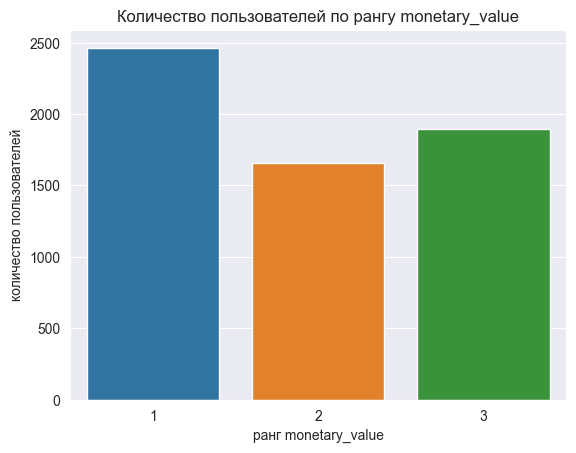

In [33]:
sns.countplot(data=users_rfm, x='monetary_value')
plt.title('Количество пользователей по рангу monetary_value')
plt.ylabel('количество пользователей')
plt.xlabel('ранг monetary_value');

In [34]:
# складываем ранги для каждого пользователя, чтобы определить его сегмент
users_rfm['rfm_segment'] = users_rfm.apply(lambda x: str(x['recency']) + str(x['frequency']) + str(x['monetary_value']), axis=1)

In [35]:
users_rfm = users_rfm.sort_values(by='rfm_segment')

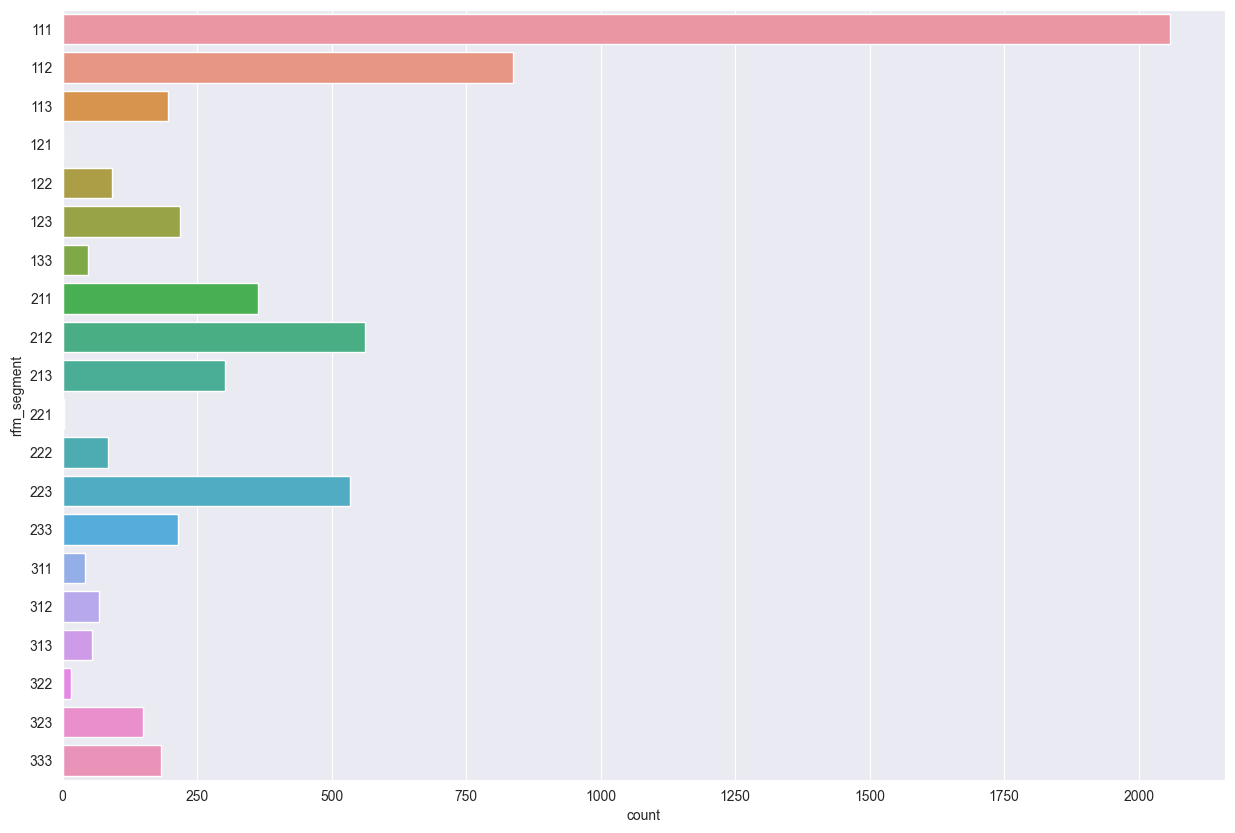

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(y=users_rfm['rfm_segment']);

## Выводы по RFM-анализу
* у нас очень много "оттоковых пользователей" *(сегменты 111, 112)* - пользователи, которые воспользовались сервисом давно, один раз и не принесли много выручки. На таких пользователей не стоит тратить много ресурсов, так как потраченные ресурсы вероятно не окупяться
* стоит обратить внимание на пользователей сегментов 223, 233 - эти пользователи приносили много выручки, но есть риск, что они покинули наш сервис;
* пользователей сегментов 213, 313 стоит стимулировать делать больше покупок. Такие пользователи совершали 1-2 покупки и принесли неплохую выручку своими заказами;
* сегменты 322, 323, 333 - наша целевая прибыльная аудитория. Нужно узнать побольше о них, чтобы ответить на вопросы:
    - кто наша целевая аудитория?
    - какие у них общие признаки?
    - есть ли возможности для привлечения таких же пользователей? 

# Итоговый вывод   
**Выполненные задачи**:   
1. Рассчитал основные метрики для оценки деятельности сервиса доставки еды;   
2. Проанализировал эти метрики в динамике;   
3. Составил профили пользователей для RFM анализа;
4. Провёл RFM-анализ, которые показал следующие выводы:   
    * Около 3000 пользователей совершили 1-2 покупки и перестали пользоваться сервисом;   
    * Около 400 пользователей входят в сегмент самых ценных пользователей. Дальнейшая цель - побольше узнать этих пользователей, чтобы определить целевую аудиторию сервиса.